# 🎯 Linear Regression 101 — Predicting Salary from Experience  

**Dataset:** Salary dataset (Years of Experience → Salary)   
**Tags:** `Linear Regression`, `Beginner`, `Machine Learning`, `Scikit-learn`, `EDA`  

---


# Introduction to Linear Regression  

Welcome, Kagglers! 👋  

Linear Regression is one of the most **fundamental algorithms** in both statistics and machine learning. It helps us model the relationship between a **dependent variable (target)** and one or more **independent variables (features)**.  

👉 Our Goal: Predict **Salary** 💰 based on an employee’s **Years of Experience** 📅.  

📌 **Real-world examples:**  
- Predicting **house prices** 🏡 from size and age  
- Estimating **sales** 📈 based on ad spending  
- Forecasting **energy usage** ⚡ from weather data  

# The Mathematics Behind Linear Regression  

- **Simple Linear Regression (1 feature):**  
\[
y = \beta_0 + \beta_1 x + \epsilon
\]  

Where:  
- \( y \) → target (Salary)  
- \( x \) → feature (Years of Experience)  
- \( \beta_0 \) → intercept (salary when experience = 0)  
- \( \beta_1 \) → slope (how much salary increases per year)  
- \( \epsilon \) → error (random noise)  

📉 The model learns by minimizing the **Mean Squared Error (MSE):**  
\[
MSE = \frac{1}{N}\sum (y_i - \hat{y}_i)^2
\]  




# Coming Up: Hands-On Example
We'll now build a simple linear regression model to:

Predict **Salary** 💰 based on an employee’s **Years of Experience** 📅

## 📦 Import Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Styling
sns.set(style="whitegrid")


## 📂 Load Dataset

In [2]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

# Drop unnecessary columns (if exist)
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Preview dataset
df.head()


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Dataset Info

In [3]:
print("Dataset Shape:", df.shape)
print("\nInfo:")
df.info()

print("\nSummary Statistics:")
df.describe()


Dataset Shape: (30, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes

Summary Statistics:


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


## 📈 Exploratory Data Analysis (EDA)  

Let's visualize the relationship between **Years of Experience** and **Salary**.


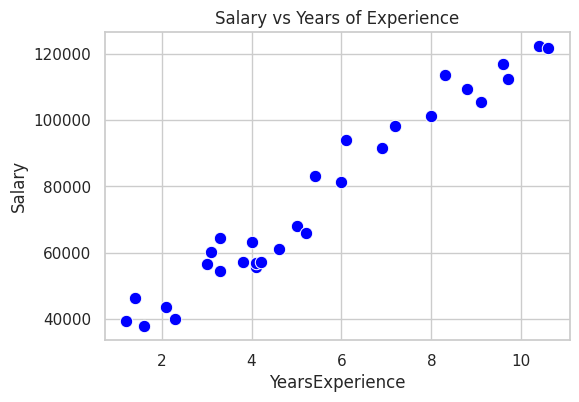

In [4]:
# Scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x="YearsExperience", y="Salary", data=df, s=80, color="blue")
plt.title("Salary vs Years of Experience")
plt.show()

In [5]:
# Correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## 🧹 Data Preparation  

Now we prepare the features (X) and target (y) and split the dataset into **training** and **testing** sets.


In [6]:
# Features (X) and target (y)
X = df[["YearsExperience"]]
y = df["Salary"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((24, 1), (6, 1))

## ⚙️ Building & Training the Model  


In [7]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
print("Intercept (β₀):", model.intercept_)
print("Coefficient (β₁):", model.coef_[0])

# Interpretation
print(f"\n👉 Interpretation: For every additional year of experience, "
      f"the salary increases by about ${model.coef_[0]:.2f}. "
      f"The baseline salary (0 years of experience) is about ${model.intercept_:.2f}.")


Intercept (β₀): 24380.201479473704
Coefficient (β₁): 9423.815323030976

👉 Interpretation: For every additional year of experience, the salary increases by about $9423.82. The baseline salary (0 years of experience) is about $24380.20.


## 📊 Predictions & Results  

In [8]:
# Predict on test set
y_pred = model.predict(X_test)

# Compare actual vs predicted
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Difference": y_test.values - y_pred
})
results.head(10)


,Actual,Predicted,Difference
0,112636.0,115791.210113,-3155.210113
1,67939.0,71499.278095,-3560.278095
2,113813.0,102597.868661,11215.131339
3,83089.0,75268.804224,7820.195776
4,64446.0,55478.792045,8967.207955
5,57190.0,60190.699707,-3000.699707


## 📏 Evaluating Model Performance  


In [9]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE: ${mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
MAE: $6286.45
MSE: 49830096.86
RMSE: $7059.04
R² Score: 0.9024


## Visualization

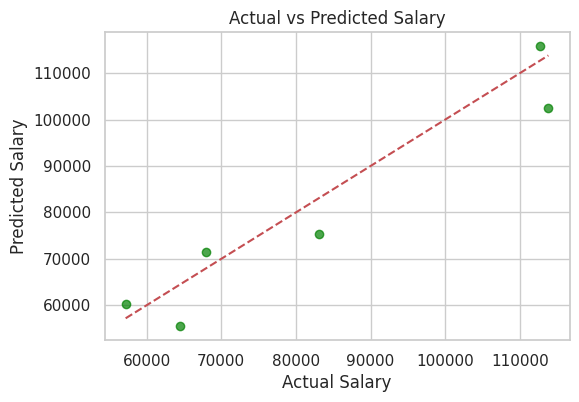

In [10]:
# Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

# 📌 Best Practices & Assumptions  

Linear Regression assumes:

1. **Linearity** → relationship between X & y is linear  
2. **Independence** → data points are independent  
3. **Homoscedasticity** → errors have constant variance  
4. **Normality** → errors follow a normal distribution  

👉 For simple regression (1 feature), multicollinearity is not a concern.  


# 🏆 Your Challenge  

Try extending this project:

* Add more features (e.g., `Education Level`, `Job Title`)  
* Test different datasets (e.g., California Housing 🏡)  
* Try **Polynomial Regression** if the trend looks non-linear  


# 🎯 Conclusion  

In this notebook, we:  
✔️ Explored a Salary dataset  
✔️ Built a **Simple Linear Regression** model  
✔️ Evaluated it with MAE, RMSE, and R²  
✔️ Visualized predictions & residuals  

👉 **Interpretation:** Every extra year of experience increases salary by roughly **β₁ dollars**. The intercept β₀ gives the baseline salary at 0 years of experience.  

⚠️ Note: This dataset is very small (**30 rows**) — perfect for learning, but too small for real-world applications.  

Linear Regression is a great starting point and the **foundation for advanced models** like Ridge, Lasso, and even Neural Networks.  

🚀 Next: Try **Regularization**, **Polynomial Regression**, or compare with Decision Trees & Random Forests.  

Happy Modeling! 🌟  
